### 1.1 Equations

The hydrostatic system with self-gravity-- 

For an isothermal gas, the dynamics is governed by continuity eqution and momentum equation. They are given as follows,

The mass-continuity equation
$$
\begin{equation}
    \frac{\partial \rho}{\partial t} + \nabla.(\rho \vec v) =0
\end{equation}\tag{1}
$$
The momentum equation 
$$
\begin{eqnarray}
\rho \frac{d \vec v}{ d t} = - \nabla P + \rho \vec g \\
\rho \left[\frac{\partial v}{\partial t}+ (\vec v . \nabla)\vec v \right] = - \nabla P + \rho \vec g
\end{eqnarray}\tag{3}
$$
The self-gravity is 
$$
\begin{equation}
\nabla. \vec g = -4\pi G\rho
\end{equation}\tag{3}
$$

where
$$
\begin{equation}
\nabla^2 \phi =  4 \pi G \rho
\end{equation}\tag{4}
$$
is Poisson's equation and  

$$
\begin{equation}
\nabla \phi =  - \vec g 
\end{equation}\tag{5}
$$

<!-- For simplicity, we consider only 1-D. Later in the paper, we will implement 2D using PINNS.
$$
\begin{eqnarray}
    \frac{\partial \rho_1}{\partial t} + \rho_0 \frac{\partial v_1} {\partial x}  = 0 \\
    \rho_0 \frac{\partial v_1}{\partial t} = - c_s^{2} \frac{\partial \rho_1}{\partial x}  + \rho g_{1} \\
    % P_{1} = \gamma \frac{P_{0}}{\rho_0} \rho_1\\
    \frac{\partial g_1}{\partial x} = - 4 \pi G \rho_1
\end{eqnarray}\tag{6}
$$

#### The initial conditions is derivered using linear analysis (refer to the paper)

$$
\begin{eqnarray}
\rho(x,t=0) &=& \rho_{0} + \rho_{1}\cos\left(2\pi x/\lambda\right)
\end{eqnarray}\tag{7}
$$

When self-gravity is active and $\lambda> \lambda_{J}$ 

$$
\begin{eqnarray}
v_{x}(x,t=0) &=& -v_{1} \sin\left(2\pi x/\lambda\right)
\end{eqnarray}\tag{8}
$$

where $v_1 = \frac{\alpha}{k} \frac{\rho_1}{\rho}$ and 
$$
\begin{eqnarray}
    \alpha = \sqrt{ 4 \pi G \rho_0 - c_s^2 k^2}
\end{eqnarray}\tag{9}
$$
however for $\lambda < \lambda_{J}$  and for non self-gravitating system 

$$
\begin{eqnarray}
v_{x}(x) &=& v_{1} \cos\left(2\pi x/\lambda\right)
\end{eqnarray}\tag{10} -->
% $$

% #### Considering Periodic Boundary Conditions


% $$
% \begin{eqnarray}
% \rho(x=0,t) &=& \rho (x=xmax,t)\\
% v_{x}(x=t,t) &=& v_{x}(x
% \end{eqnarray}\tag{11}
% $$

% <!-- $$
% \begin{eqnarray}
% =xmax,t)
% \end{eqnarray}\tag{12}
% $$ -->




### 1.3 LAX Method

Here the Lax method is used to integrate the flux conservative form of the continuity and momentum equations. For an equation of the form 

$$
\begin{equation}
\frac{\partial f}{\partial t} = -\frac{\partial }{\partial x}\left(fv\right)
\end{equation}\tag{13}
$$

the Lax method is the finite-difference approximation,

$$
\begin{equation}
\frac{f^{n+1}_{j}-\left( f^{n}_{j+1} + f^{n}_{j-1}\right)/2}{\Delta t}=-\frac{f^{n}_{j+1}v^{n}_{j+1}-f^{n}_{j-1}v^{n}_{j-1}}{2\Delta x}
\end{equation}\tag{14}
$$
Forward Time Centered Space (FTCS) method is unconditionally unstable . But the Lax method is conditionally stable if,

$$
\begin{equation}
\nu \equiv \frac{c\Delta t}{\Delta x} \leq 1
\end{equation}\tag{15}
$$

Where $\nu$ is known as Courant number. Physically it means that the signal cannot travel more than $\Delta x$ in $\Delta t$ time.

The continuity equation

$$
\begin{eqnarray}
\frac{\partial \rho}{\partial t} &=& -\frac{\partial}{\partial x}\left(\rho v_{x}\right)\\
\end{eqnarray}\tag{16}
$$

The momemtum equation

$$
\begin{eqnarray}
\rho\frac{\partial v_{x}}{\partial t}+\rho v_{x}\frac{\partial v_{x}}{\partial x} &=& -c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho \vec{g} \nonumber\\
\Rightarrow \rho\frac{\partial v_{x}}{\partial t} +\frac{\partial\rho v_{x} v_{x}}{\partial x} - v_{x}\frac{\partial\rho v_{x}}{\partial x} &=& -c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho \vec{g} \nonumber\\
\Rightarrow \rho\frac{\partial v_{x}}{\partial t} - v_{x}\frac{\partial \rho v_{x}}{\partial x} &=&-\frac{\partial \rho v_{x} v_{x}}{\partial x}-c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho \vec{g}
\end{eqnarray}\tag{17}
$$

Now substituting equation (16) in to second term of (17c) we get,
$$
\begin{eqnarray}
\rho\frac{\partial v_{x}}{\partial t} +v_{x}\frac{\partial \rho}{\partial t} &=& -\frac{\partial\rho v_{x} v_{x}}{\partial x}-c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho \vec{g}\nonumber\\
\Rightarrow \frac{\partial\rho v_{x}}{\partial t} &=&-\frac{\partial\rho v_{x} v_{x}}{\partial x}-c^{2}_{s}\frac{\partial\rho}{\partial x}+ \rho \vec{g}\nonumber
\end{eqnarray}\tag{18}
$$

Hence the flux conservative form of momentum equation and the continuity equation is given by,

$$
\begin{eqnarray}
\frac{\partial \rho}{\partial t} &=& -\frac{\partial}{\partial x}\left(\rho v_{x}\right)\\
\end{eqnarray}\tag{19}
$$
$$
\begin{eqnarray}
\frac{\partial\left(\rho v_{x}\right)}{\partial t} &=&-\frac{\partial}{\partial x}\left(\rho v_{x} v_{x}\right)-c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho \vec{g}
\end{eqnarray}\tag{20}
$$

Gas boundary and initial condition.


$$
\begin{eqnarray}
\rho(x) &=& \rho_{0} + \rho_{1}\cos\left(2\pi x/\lambda\right)\\
v_{x}(x) &=& v_{1} \cos\left(2\pi x/\lambda\right) or \\
\end{eqnarray}\tag{21}
$$

If $\omega^2 < 0$, the system in unstable such that $4 \pi G \rho_0 > c_s^2 k^2$. The $\omega = \pm i \alpha$ where 

$$
\begin{eqnarray}
    \alpha = \sqrt{ 4 \pi G \rho_0 - c_s^2 k^2}
\end{eqnarray}
$$

Then the initial velocity perturbation is
$$
\begin{eqnarray}
v_{x}(x) &=& - v_{1} \sin\left(2\pi x/\lambda\right)
\end{eqnarray} \tag{22}
$$

where
$$
\begin{eqnarray}
     i \omega \rho_1 - i  k \rho_0 v_1 =& 0  \\ \nonumber
     v_1 =& \frac{\omega}{k}\frac{\rho_1}{\rho_0} 
\end{eqnarray}
$$

In this section using the Lax method equation (9) and (10) are solved. If the equation (2) is subsituted in  (19) and (20) we will get the following as the solution for $\rho$ and $v_{x}$.

$$
\begin{eqnarray}
\rho^{n+1}_{j}= \frac{1}{2}\left(\rho^{n}_{j+1} +\rho^{n}_{j-1}\right)-\frac{\Delta t}{2\Delta x}\left(\rho^{n}_{j+1} v^{n}_{j+1}-\rho^{n}_{j-1} v^{n}_{j-1}\right)\\
U^{n+1}_{j} = \frac{1}{2}\left(U^{n}_{j+1} +U^{n}_{j-1}\right)-\frac{\Delta t}{2\Delta x}\left(U^{n}_{j+1} v^{n}_{j+1}-U^{n}_{j-1} v^{n}_{j-1}\right)-\frac{c^{2}_{s}\Delta t}{2\Delta x}\left(\rho^{n}_{j+1}-\rho^{n}_{j-1}\right) -\frac{\Delta t \rho^n_{j}}{2\Delta x}\left(\phi^{n}_{j+1}-\phi^{n}_{j-1}\right)
\end{eqnarray}
$$

$$
\begin{equation}
U^{n}_{j} = v^{n}_{j} \rho^{n}_{j}
\end{equation}
$$



In [1]:
import numpy as np
import os

# Import TensorFlow and NumPy
#import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import scipy


## For the FFT solver

from numpy.fft import fft, ifft
from scipy import signal

np.random.seed(1234)
# tf.random.set_seed(1234)

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
def fft_solver(rho,Lx,N, dim = None):
    
    '''
    A FFT solver that uses discrete Fast Fourier Transform to
    solve the poisson Equation:
    We apply the correction due to the finite difference grid of phi
    
    Input: 1. The source function density in this case
           2. # of grid point N
           3. Domain Size in each dimension
    
    Output: the potential phi and the field g 
    
    '''
    nx = N
    Lx = Lx
    
    dx = Lx / nx
    
    
    # Calculate the Fourier modes of the gas density
    rhohat = fft(rho)

    # Calculate the wave numbers in x and y directions
    kx = 2 * np.pi * np.fft.fftfreq(nx, dx)
    #ky = 2 * np.pi * np.fft.fftfreq(ny, dy)

    # Construct the Laplacian operator in Fourier space
    kx2 = np.meshgrid(kx**2)
    
#     laplace = -(kx**2 )
    ## Laplace with the correction refer to the notes
    laplace = 2*(np.cos(kx*dx)-1)
    
    ## Inorder to avoid the inf we replace zero with a small number
    laplace[laplace == 0] = 1e-9
    
    # Solve for the gravitationa potential in Fourier space
    phihat = rhohat / laplace
    
    phihat = rhohat * dx**2/laplace

    phi = np.real(ifft(phihat))
    
    ## The field ,i.e., gravity 
#     dphidx = np.gradient(phi, dx)

    return phi

In [3]:
def lax_solution(time,N,nu,lam,num_of_waves,rho_1,gravity=False,isplot = None,comparison =None,animation=None):
    '''
    This function solves the hydrodynamic Eqns in 1D with/without self gravity using LAX methods 
    described above 
    
    
    Input:  Time till the system is integrated :time
            Number of Xgrid points : N
            Courant number : nu
            Wavelength : If lambda> lambdaJ (with gravity--> Instability) else waves propagation 
            Number of waves : The domain size changes and with this maintains periodicity
            Density perturbation : rho_1 (for linear or non-linear perturbation)
            Gravity:  If True it deploys the FFT routine to estimate the potential 
            isplot(optional): if True plots the outputs
            Comparison (optional) : If True then the plots are overplotted with LT solutions for comparison
            Animation (optional): Not used at the moment
    
    Output: Density, velocity + (phi and g if gravity is True)
            isplot: True then the plots are generated 
    
    '''
    
    
    # rho_max = []
    lam = lam          # one wavelength
    num_of_waves  = num_of_waves  
    L = lam * num_of_waves            # Maximum length (two wavelength)
    
    print("at time= ",time)
    ### Declaring the Constants

    c_s = 1.0            # % Sound Speed  
    rho_o = 1.0          # zeroth order density
    nu = nu              # courant number (\nu = 2 in 2d)
    rho_1 = rho_1        # for linear/nonlinear wave propagation
    const =  1           # The actual value is 4*pi
    G = 1.0              # Gravitational Constant

    ### Grid X-T 
    N = N                # The grid resolution values2d:N =(10,50,100,500)
    dx = float(L/N)      # length spacing          
    dt = nu*dx/c_s       # time grid spacing
 

    ## For simplification
    mu = dt/(2*dx)      # is the coefficient in the central differencing Eqs above 
    
    n = int(time/dt)     # grid points in time
    print("For dx = {} and dt = {} and time gridpoints n = {} ".format(dx,dt,n))
    
    ########### Initializing the ARRAY #######################
    x = np.linspace(0, L, N)
    rho = np.zeros((n,N))
    phi = np.zeros((n,N))
    v =np.zeros((n,N))  
    P =np.zeros((n,N)) # The flux term 
    
    
    ## Calculating the jeans length if gravity is Turned on
    if gravity:
        jeans = np.sqrt(4*np.pi**2*c_s**2/(const*G*rho_o))
        print("Jean's Length",jeans)

    
    ######################## Initial Conditions ###########################
    rho[0,:] = rho_o + rho_1* np.cos(2*np.pi*x/lam) # defing the density at t = 0 EQ 11
    
    if gravity == False:
        print("Propagation of Sound wave") 
        v_1 = (c_s*rho_1)/rho_o # velocity perturbation
        v[0,:] = v_1 * np.cos(2*np.pi*x/lam) # the velocity at t =0
        ## Linear Theory
        if comparison:
            rho_LT  = rho_o + rho_1*np.cos(2*np.pi * x/lam - 2*np.pi/lam *time)
            rho_LT_max = np.max(rho_o + rho_1*np.cos(2*np.pi * x/lam - 2*np.pi/lam *time))
            v_LT = v_1* np.cos(2*np.pi * x/lam - 2*np.pi/lam *time) 
    
    else:    ######## When self-gravity is True and see EQN 22
        if lam >= jeans:  
            print("There is gravitational instabilty  lam = {} > l_jean ={}".format(lam,jeans))
            alpha = np.sqrt(const*G*rho_o-c_s**2*(2*np.pi/lam)**2)
            v_1  = (rho_1/rho_o) * (alpha/(2*np.pi/lam)) ## With gravity        
            v[0,:] = - v_1 * np.sin(2*np.pi*x/lam) # the velocity at t =0
            
            ##### Density  and velocity  from Linear Theory at t 
            if comparison:
                rho_LT = rho_o + rho_1*np.exp(alpha * time)*np.cos(2*np.pi*x/lam)
                rho_LT_max = np.max(rho_o + rho_1*np.exp(alpha * time)*np.cos(2*np.pi*x/lam))
                v_LT = -v_1*np.exp(alpha * time)*np.sin(2*np.pi*x/lam)
#             print("rho_theory_max={} and the max density {} at time {}".format(rho_LT_max ,rho_max, round(time,2)))

        else:
            print("There is no gravitational instabilty as lam = {} < l_jean ={}".format(lam,jeans))
            alpha = np.sqrt(c_s**2*(2*np.pi/lam)**2 - const*G*rho_o)
            v_1 = (rho_1/rho_o) * (alpha/(2*np.pi/lam)) # velocity perturbation
            v[0,:] = v_1 * np.cos(2*np.pi*x/lam) # the velocity at t =0

            ##### Density  and velocity  from Linear Theory at t
            if comparison:
                rho_LT = rho_o + rho_1*np.cos(alpha * time - 2*np.pi*x/lam)
                rho_LT_max = np.max(rho_o + rho_1*np.cos(alpha * time - 2*np.pi*x/lam))
                v_LT = v_1*np.cos(alpha * time - 2*np.pi*x/lam)

        ## Calculating the potential and the field using FFT    
        phi[0,:] = fft_solver(const*(rho[0,:]-rho_o),L,N, dim = None)

    ######### The Flux term #########
    P=rho*v

    #################################FINITE DIFFERENCE #######################
    for k in range(1,n): ## Looping over time 

        rho[k,:] = 0.5*(np.roll(rho[k-1,:],-1)+ np.roll(rho[k-1,:],1))-(mu*(np.roll(rho[k-1,:],-1)*np.roll(v[k-1,:],-1)-np.roll(rho[k-1,:],1)*np.roll(v[k-1,:],1)))

        if gravity == False: ## Hydro sound wave when gravity is absent 

            P[k,:] = 0.5*(np.roll(P[k-1,:],-1)+ np.roll(P[k-1,:],1))-(mu*(np.roll(P[k-1,:],-1)*np.roll(v[k-1,:],-1)- np.roll(P[k-1,:],1)*np.roll(v[k-1,:],1)))-((c_s**2)*mu*(np.roll(rho[k-1,:],-1)- np.roll(rho[k-1,:],1)))
        else: ## With self-gravity activated 

            P[k,:] = 0.5*(np.roll(P[k-1,:],-1)+ np.roll(P[k-1,:],1))-(mu*(np.roll(P[k-1,:],-1)*np.roll(v[k-1,:],-1)- np.roll(P[k-1,:],1)*np.roll(v[k-1,:],1)))\
            -((c_s**2)*mu*(np.roll(rho[k-1,:],-1)- np.roll(rho[k-1,:],1))) -(mu*rho[k-1,:]*(np.roll(phi[k-1,:],-1)- np.roll(phi[k-1,:],1))) #  

            phi[k,:] = fft_solver(const*(rho[k,:]-rho_o),L,N, dim = None) ## Please note we don't use dphidx rather calculate using central differencing

    

        v[k,:] = P[k,:]/rho[k,:] ## 1-D velocity 
        
    rho_max = np.max(rho)   ## Maximum density from the FD calculation 
    
    
    ################################# PLOTTING #######################
 
    if isplot : 
        plt.figure(1,figsize=(6,4))
        plt.plot(x,rho[n-1,:]-rho_o,linewidth=1,label="FD at t={}".format(round(time,2)))
        plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
        plt.xlabel(r"$\mathbf{x}$")
        # plt.text(.6,.15,r"dt=%f"%(dt),fontsize=12)
        plt.title("At time {} and rho_1 = {}".format(time,rho_1))
        plt.ylabel(r"$\mathbf{\rho - \rho_{0}}$")
        if comparison : 
            plt.plot(x,rho_LT-rho_o,'--',linewidth=1,label="LT")
            plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)

        plt.figure(2,figsize=(6,4))
        plt.plot(x,v[n-1,:],'--',markersize=2,label="t={}".format(round(time,2)))
        plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
        plt.xlabel(r"$\mathbf{x}$")
        plt.title(r"Lax Solution Velocity For $\rho_1$ = {}".format(rho_1))
        plt.ylabel("velocity")
        if comparison : 
            plt.plot(x,v_LT,'--',linewidth=1,label="LT")
            plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)    

        if gravity:
             #### Plotting the comparison of the \rho_max for FD and Linear Theory 
            
            plt.figure(3,figsize=(6,4))                                
            plt.scatter(time,rho_max,label="LT")                     
            plt.xlabel("t")
            plt.ylabel(r"$\log (\rho_{\rm max} - \rho_{0}) $")
            plt.yscale('log')            
            if comparison : 
                plt.scatter(time,rho_LT_max,facecolors='none', edgecolors='r',label="LT") 
                plt.legend(numpoints=1,loc='upper left',fancybox=True,shadow=True)

            ## Plotting the gravitational potential (\phi) and field (g)
            plt.figure(4,figsize=(6,4))
            plt.plot(x,phi[n-1,:],'--',markersize=2,label="t=phi at {}".format(round(time,2)))
            plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
            plt.xlabel(r"$\mathbf{x}$")
            plt.title(r"Lax Solution Phi For $\rho_1$ = {}".format(rho_1))
            plt.ylabel(r"$\Phi$")

    else:
        if gravity:
            if comparison:
                return x,rho,v,phi,n,rho_LT,rho_LT_max,rho_max,v_LT
            else:
                return x,rho,v,phi,n,rho_max
        else:
            if comparison:
                return rho,v,rho_LT,rho_LT_max,rho_max,v_LT
            else:
                return rho,v,rho_max
            
    ## Clearing the memory
    del rho, phi, v, P

at time=  1
For dx = 0.021 and dt = 0.0105 and time gridpoints n = 95 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7.0 > l_jean =6.283185307179586
Total time = 0.14563584327697754 sec for N= 1000


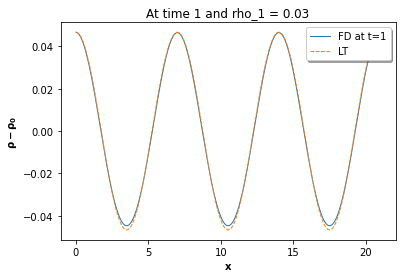

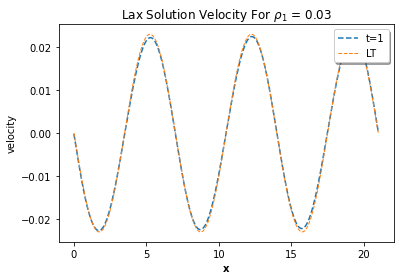

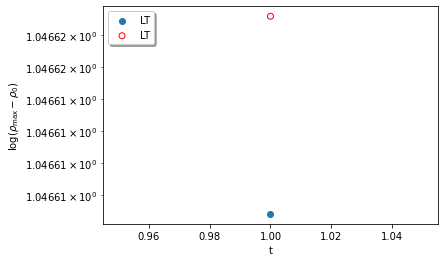

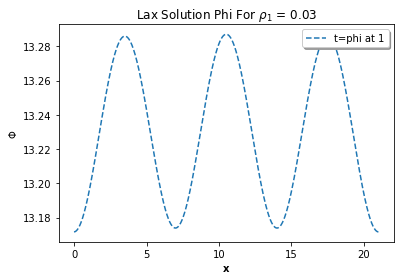

In [6]:
lam = 7.0           # one wavelength
num_of_waves = 3    # the number of waves
rho_1 = 0.03;       # perturbation strength
nu = 0.5            # COURANT number
N = 1000           # number of grid points

import time

start = time.time()


t = 1          # time till integrate
lax_solution(t,N,nu,lam,num_of_waves,rho_1,gravity=True,isplot = True,comparison = True)

end = time.time()
print("Total time = {} sec for N= {}".format(end - start,N))

## To check the time evolution 

at time=  0.5
For dx = 0.021 and dt = 0.0105 and time gridpoints n = 47 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7.0 > l_jean =6.283185307179586
at time=  1.5
For dx = 0.021 and dt = 0.0105 and time gridpoints n = 142 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7.0 > l_jean =6.283185307179586
at time=  2.5
For dx = 0.021 and dt = 0.0105 and time gridpoints n = 238 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7.0 > l_jean =6.283185307179586


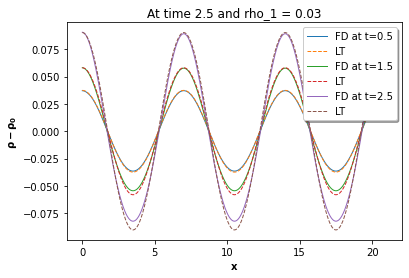

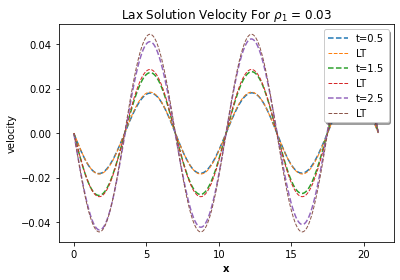

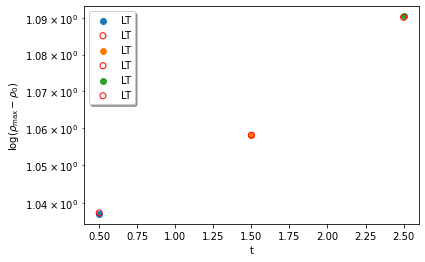

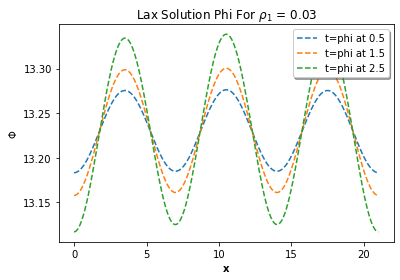

In [7]:
time_array = np.asarray([0.5,1.5,2.5])
for time in time_array:
    lax_solution(time,N,nu,lam,num_of_waves,rho_1,gravity=True,isplot = True,comparison = True,animation=None)